<a href="https://colab.research.google.com/github/haoboooo/Pretrained-CNN-Binary-Classification-in-Skin-Cancer/blob/main/skin_cancer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the library of kaggle
!pip install kaggle

In [ ]:
import json
token = {"username":"haoboxu","key":"9cac2e577f5875ae376eece6b11cdd49"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

In [ ]:
# 创建文件夹保存密钥
!mkdir -p ~/.kaggle

In [ ]:
# 复制json到路径下
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
# 修改权限确保后续操作正常
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 指定数据集保存的位置
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
# download the dataset from kaggle
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 96% 312M/325M [00:02<00:00, 133MB/s]
100% 325M/325M [00:02<00:00, 121MB/s]


In [ ]:
!unzip /content/datasets/fanconic/skin-cancer-malignant-vs-benign/skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [ ]:
###### datasets have already downloaded, don't change codes above#####

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # build layer
from tensorflow.keras.models import Sequential # build model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # preprocessing data

import numpy as np #matrices operation
import os
import matplotlib.pyplot as plt #draw diagram
import PIL
from PIL import Image
import pathlib

In [ ]:
#parameters (changing)
train_dir = '/content/train'
test_dir = '/content/test'
batch_size = 128
epochs = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
#data augmentation
#preprocessing data

train_image_generator = ImageDataGenerator(rescale=1./255,#归一化
                                           horizontal_flip=True, #图片翻转, augmentation technology
                                           width_shift_range=.15, #宽变化
                                           height_shift_range=.15, #高变化
                                           rotation_range=45,#旋转45度
                                           zoom_range=0.5 #缩放0.5倍
)
test_image_generator = ImageDataGenerator(rescale=1./255) #test dataset without augmentation

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,#训练集路径
                                                           shuffle=True, #打乱图片顺序
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),#修改图片尺寸
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=test_dir,#测试集路径
                                                             target_size=(IMG_HEIGHT,IMG_WIDTH), #修改图片尺寸
                                                             class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


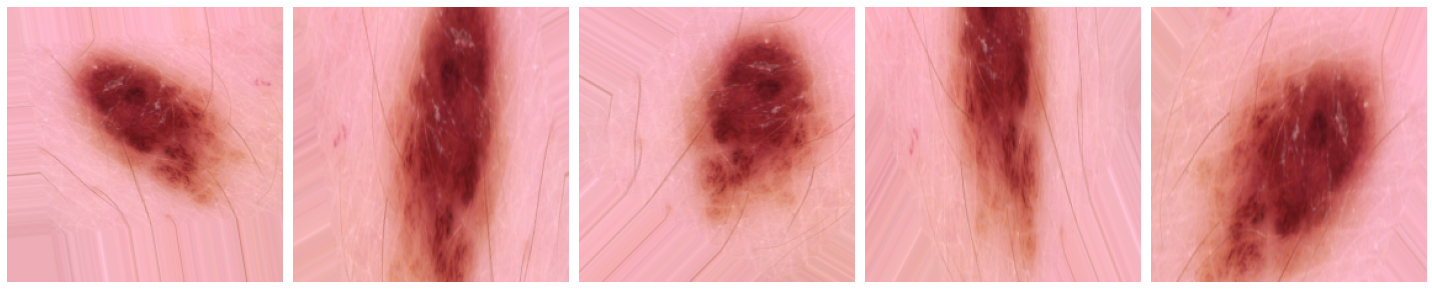

In [ ]:
# plot images we obtain using plt library
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augemted_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augemted_images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
##### build our mobilenet__ model #####
base_mobile_net__ = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights=None)
# DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

mobilenet__ = tf.keras.Sequential([
    base_mobile_net__,
    global_average_layer,
    prediction_layer                 
])
mobilenet__.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our mobilenet model #####
history = mobilenet__.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/32


In [ ]:
##### build our Mobilenet model #####
base_model = tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer                 
])

In [ ]:
##### compile our Mobilenet model #####
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##### train our Mobilenet model #####
history = model.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/32
21/21 [==============================] - 195s 9s/step - loss: 0.5936 - accuracy: 0.6943 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 2/32
21/21 [==============================] - 187s 9s/step - loss: 0.4602 - accuracy: 0.7778 - val_loss: 0.6905 - val_accuracy: 0.5455
Epoch 3/32
21/21 [==============================] - 190s 9s/step - loss: 0.4447 - accuracy: 0.7804 - val_loss: 0.7006 - val_accuracy: 0.5455
Epoch 4/32
21/21 [==============================] - 187s 9s/step - loss: 0.4315 - accuracy: 0.7994 - val_loss: 0.6983 - val_accuracy: 0.5455
Epoch 5/32
21/21 [==============================] - 187s 9s/step - loss: 0.4184 - accuracy: 0.7998 - val_loss: 0.7090 - val_accuracy: 0.5455
Epoch 6/32
21/21 [==============================] - 184s 9s/step - loss: 0.3947 - accuracy: 0.7967 - val_loss: 0.7055 - val_accuracy: 0.5455
Epoch 7/32
21/21 [==============================] - 192s 9s/step - loss: 0.3949 - accuracy: 0.8062 - val_loss: 0.7011 - val_accuracy: 0.5455
Epoch 8/32
21

In [ ]:
##### build our mobilenet model #####
base_mobile_net = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

mobilenet = tf.keras.Sequential([
    base_mobile_net,
    DROP,
    global_average_layer,
    prediction_layer                 
])
mobilenet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our mobilenet model #####
history = mobilenet.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/32
42/42 [==============================] - 455s 11s/step - loss: 0.5625 - accuracy: 0.7148 - val_loss: 0.6986 - val_accuracy: 0.5455
Epoch 2/32
42/42 [==============================] - 457s 11s/step - loss: 0.4631 - accuracy: 0.7672 - val_loss: 0.8336 - val_accuracy: 0.5455
Epoch 3/32
42/42 [==============================] - 454s 11s/step - loss: 0.4397 - accuracy: 0.7819 - val_loss: 0.9960 - val_accuracy: 0.5455
Epoch 4/32
42/42 [==============================] - 453s 11s/step - loss: 0.4229 - accuracy: 0.7861 - val_loss: 1.1394 - val_accuracy: 0.5455
Epoch 5/32
42/42 [==============================] - 456s 11s/step - loss: 0.4176 - accuracy: 0.7918 - val_loss: 1.2022 - val_accuracy: 0.5455
Epoch 6/32
42/42 [==============================] - 449s 11s/step - loss: 0.4077 - accuracy: 0.8017 - val_loss: 1.4924 - val_accuracy: 0.5455
Epoch 7/32
42/42 [==============================] - 442s 11s/step - loss: 0.4110 - accuracy: 0.8028 - val_loss: 1.4436 - val_accuracy: 0.5455
Epoch 

In [ ]:
##### build our pre_MobileNet model #####
pre_mobile1 = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights='imagenet')
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

pre_MobileNet = tf.keras.Sequential([
    pre_mobile1,
    DROP,
    global_average_layer,
    prediction_layer                 
])
pre_MobileNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our pre_MobileNet model #####
history = pre_MobileNet.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

17235968/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/32
42/42 [==============================] - 518s 12s/step - loss: 0.5256 - accuracy: 0.7948 - val_loss: 4.3929 - val_accuracy: 0.5621
Epoch 2/32
42/42 [==============================] - 515s 12s/step - loss: 0.3249 - accuracy: 0.8468 - val_loss: 4.5613 - val_accuracy: 0.5530
Epoch 3/32
42/42 [==============================] - 519s 12s/step - loss: 0.2646 - accuracy: 0.8695 - val_loss: 1.0324 - val_accuracy: 0.7197
Epoch 4/32
42/42 [==============================] - 524s 12s/step - loss: 0.2616 - accuracy: 0.8817 - val_loss: 0.5323 - val_accuracy: 0.8061
Epoch 5/32
42/42 [==============================] - 522s 12s/step - loss: 0.2423 - accuracy: 0.8923 - val_loss: 0.5177 - val_accuracy: 0.8394
Epoch 6/32
42/42 [==============================] - 521s 12s/step - loss: 0.2333 - accuracy: 0.8904 - val_loss: 0.5598 - val_accuracy: 0.8242
Epoch 7/32
42/42 [==============================] - 522s 12s/step - loss: 0.2147 - accuracy: 0.9014 - val_loss: 0.3572 - val_accuracy: 0.8545
Epoch 

In [ ]:
##### build our pre_best model #####
base_best = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights='imagenet')
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

pre_best = tf.keras.Sequential([
    base_best,
    DROP,
    global_average_layer,
    prediction_layer                 
])
pre_best.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our pre_best model #####
history = pre_best.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

17235968/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
42/42 [==============================] - 513s 12s/step - loss: 0.5750 - accuracy: 0.7755 - val_loss: 2.4820 - val_accuracy: 0.5515
Epoch 2/50
42/42 [==============================] - 507s 12s/step - loss: 0.3345 - accuracy: 0.8392 - val_loss: 1.8295 - val_accuracy: 0.5591
Epoch 3/50
42/42 [==============================] - 508s 12s/step - loss: 0.2730 - accuracy: 0.8623 - val_loss: 1.3718 - val_accuracy: 0.6697
Epoch 4/50
42/42 [==============================] - 506s 12s/step - loss: 0.2518 - accuracy: 0.8836 - val_loss: 1.6291 - val_accuracy: 0.6894
Epoch 5/50
42/42 [==============================] - 510s 12s/step - loss: 0.2272 - accuracy: 0.8931 - val_loss: 0.3402 - val_accuracy: 0.8697
Epoch 6/50
42/42 [==============================] - 519s 12s/step - loss: 0.2420 - accuracy: 0.8904 - val_loss: 0.3290 - val_accuracy: 0.8742
Epoch 7/50
42/42 [==============================] - 523s 12s/step - loss: 0.2168 - accuracy: 0.9041 - val_loss: 0.3972 - val_accuracy: 0.8485
Epoch 

In [ ]:
##### build our MobileNet2 model #####
base_mobilenet2 = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

MobileNet2 = tf.keras.Sequential([
    base_mobilenet2,
    DROP,
    global_average_layer,
    prediction_layer                 
])
MobileNet2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our MobileNet2 model #####
history = MobileNet2.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/32
42/42 [==============================] - 620s 15s/step - loss: 0.5405 - accuracy: 0.7308 - val_loss: 0.6899 - val_accuracy: 0.5455
Epoch 2/32
42/42 [==============================] - 597s 14s/step - loss: 0.4652 - accuracy: 0.7740 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 3/32
42/42 [==============================] - 574s 14s/step - loss: 0.4324 - accuracy: 0.7937 - val_loss: 0.6901 - val_accuracy: 0.5455
Epoch 4/32
42/42 [==============================] - 552s 13s/step - loss: 0.3940 - accuracy: 0.8017 - val_loss: 0.6903 - val_accuracy: 0.5455
Epoch 5/32
42/42 [==============================] - 551s 13s/step - loss: 0.3923 - accuracy: 0.8036 - val_loss: 0.6909 - val_accuracy: 0.5455
Epoch 6/32
42/42 [==============================] - 554s 13s/step - loss: 0.3805 - accuracy: 0.8176 - val_loss: 0.6917 - val_accuracy: 0.5455
Epoch 7/32
42/42 [==============================] - 550s 13s/step - loss: 0.3750 - accuracy: 0.8233 - val_loss: 0.6975 - val_accuracy: 0.5455
Epoch 

In [ ]:
##### build our pre_MobileNet2 model #####
pre_mobile = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

pre_MobileNet2 = tf.keras.Sequential([
    pre_mobile,
    DROP,
    global_average_layer,
    prediction_layer                 
])
pre_MobileNet2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our pre_MobileNet2 model #####
history = pre_MobileNet2.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

9420800/9406464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/32
42/42 [==============================] - 508s 12s/step - loss: 0.4357 - accuracy: 0.8036 - val_loss: 5.1514 - val_accuracy: 0.5485
Epoch 2/32
42/42 [==============================] - 493s 12s/step - loss: 0.3276 - accuracy: 0.8468 - val_loss: 7.3651 - val_accuracy: 0.5455
Epoch 3/32
42/42 [==============================] - 496s 12s/step - loss: 0.2807 - accuracy: 0.8749 - val_loss: 9.2409 - val_accuracy: 0.5470
Epoch 4/32
42/42 [==============================] - 501s 12s/step - loss: 0.2529 - accuracy: 0.8787 - val_loss: 12.0471 - val_accuracy: 0.5455
Epoch 5/32
42/42 [==============================] - 499s 12s/step - loss: 0.2858 - accuracy: 0.8771 - val_loss: 4.5031 - val_accuracy: 0.5455
Epoch 6/32
42/42 [==============================] - 500s 12s/step - loss: 0.2472 - accuracy: 0.8912 - val_loss: 5.3432 - val_accuracy: 0.5561
Epoch 7/32
42/42 [==============================] - 499s 12s/step - loss: 0.2375 - accuracy: 0.8896 - val_loss: 6.0389 - val_accuracy: 0.5470
Epoch

In [ ]:
##### build our ResNET model #####
base_RES = tf.keras.applications.ResNet50V2(input_shape=(128,128,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

RESNET = tf.keras.Sequential([
    base_RES,
    DROP,
    global_average_layer,
    prediction_layer                 
])
RESNET.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our ResNET model #####
history = RESNET.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
83/83 [==============================] - 2737s 33s/step - loss: 0.5322 - accuracy: 0.7531 - val_loss: 1.3017 - val_accuracy: 0.5485
Epoch 2/10
83/83 [==============================] - 2744s 33s/step - loss: 0.4369 - accuracy: 0.7782 - val_loss: 1.7128 - val_accuracy: 0.5667
Epoch 3/10
83/83 [==============================] - 2741s 33s/step - loss: 0.4373 - accuracy: 0.7918 - val_loss: 0.4137 - val_accuracy: 0.7894
Epoch 4/10
83/83 [==============================] - 2762s 33s/step - loss: 0.4198 - accuracy: 0.7941 - val_loss: 0.4863 - val_accuracy: 0.7652
Epoch 5/10
83/83 [==============================] - 2799s 34s/step - loss: 0.4339 - accuracy: 0.7911 - val_loss: 0.4971 - val_accuracy: 0.8015
Epoch 6/10
83/83 [==============================] - 2787s 34s/step - loss: 0.4221 - accuracy: 0.7975 - val_loss: 0.4224 - val_accuracy: 0.7697
Epoch 7/10
83/83 [==============================] - 2845s 34s/step - loss: 0.4075 - accuracy: 0.8017 - val_loss: 3.2273 - val_accuracy: 0.4576

In [ ]:
# build our model 1 #
cnn1 = tf.keras.models.Sequential()

cnn1.add(tf.keras.layers.Conv2D(input_shape=[128,128,3],filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# compile our model 1 #
cnn1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train our model 1 #
history = cnn1.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
83/83 [==============================] - 65s 777ms/step - loss: 0.5946 - accuracy: 0.6758 - val_loss: 0.4645 - val_accuracy: 0.7333
Epoch 2/5
83/83 [==============================] - 64s 771ms/step - loss: 0.4701 - accuracy: 0.7672 - val_loss: 0.4059 - val_accuracy: 0.7970
Epoch 3/5
83/83 [==============================] - 65s 784ms/step - loss: 0.4683 - accuracy: 0.7637 - val_loss: 0.4119 - val_accuracy: 0.7667
Epoch 4/5
83/83 [==============================] - 64s 769ms/step - loss: 0.4395 - accuracy: 0.7869 - val_loss: 0.3942 - val_accuracy: 0.8061
Epoch 5/5
83/83 [==============================] - 64s 766ms/step - loss: 0.4251 - accuracy: 0.7922 - val_loss: 0.3892 - val_accuracy: 0.8000


In [ ]:
# build our model 1 (epochs->10)#
cnn1_1 = tf.keras.models.Sequential()

cnn1_1.add(tf.keras.layers.Conv2D(input_shape=[128,128,3],filters=32,kernel_size=3,activation='relu'))
cnn1_1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_1.add(tf.keras.layers.Flatten())

cnn1_1.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn1_1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# compile our model 1 #
cnn1_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train our model 1 #
history = cnn1_1.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
83/83 [==============================] - 65s 780ms/step - loss: 0.6237 - accuracy: 0.6644 - val_loss: 0.6600 - val_accuracy: 0.6061
Epoch 2/10
83/83 [==============================] - 64s 773ms/step - loss: 0.5096 - accuracy: 0.7554 - val_loss: 0.4236 - val_accuracy: 0.7682
Epoch 3/10
83/83 [==============================] - 65s 778ms/step - loss: 0.4495 - accuracy: 0.7763 - val_loss: 0.3930 - val_accuracy: 0.7955
Epoch 4/10
83/83 [==============================] - 64s 772ms/step - loss: 0.4268 - accuracy: 0.7933 - val_loss: 0.3951 - val_accuracy: 0.7803
Epoch 5/10
83/83 [==============================] - 64s 769ms/step - loss: 0.4165 - accuracy: 0.7854 - val_loss: 0.3690 - val_accuracy: 0.8152
Epoch 6/10
83/83 [==============================] - 64s 763ms/step - loss: 0.4318 - accuracy: 0.7876 - val_loss: 0.4249 - val_accuracy: 0.7864
Epoch 7/10
83/83 [==============================] - 64s 769ms/step - loss: 0.4188 - accuracy: 0.7933 - val_loss: 0.3761 - val_accuracy: 0.7924

In [ ]:
# build our model 1 (img->224*224)#
cnn1_2 = tf.keras.models.Sequential()

cnn1_2.add(tf.keras.layers.Conv2D(input_shape=[224,224,3],filters=32,kernel_size=3,activation='relu'))
cnn1_2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_2.add(tf.keras.layers.Flatten())

cnn1_2.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn1_2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# compile our model 1 #
cnn1_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train our model 1 #
history = cnn1_2.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
83/83 [==============================] - 189s 2s/step - loss: 0.6385 - accuracy: 0.6553 - val_loss: 0.4959 - val_accuracy: 0.7621
Epoch 2/5
83/83 [==============================] - 187s 2s/step - loss: 0.4636 - accuracy: 0.7619 - val_loss: 0.4223 - val_accuracy: 0.7576
Epoch 3/5
83/83 [==============================] - 186s 2s/step - loss: 0.4338 - accuracy: 0.7823 - val_loss: 0.4490 - val_accuracy: 0.8121
Epoch 4/5
83/83 [==============================] - 195s 2s/step - loss: 0.4117 - accuracy: 0.7975 - val_loss: 0.3771 - val_accuracy: 0.8333
Epoch 5/5
83/83 [==============================] - 196s 2s/step - loss: 0.4197 - accuracy: 0.7952 - val_loss: 0.4532 - val_accuracy: 0.8091


In [ ]:
# build our model 1 (img->64*64)#
cnn1_3 = tf.keras.models.Sequential()

cnn1_3.add(tf.keras.layers.Conv2D(input_shape=[64,64,3],filters=32,kernel_size=3,activation='relu'))
cnn1_3.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_3.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_3.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_3.add(tf.keras.layers.Flatten())

cnn1_3.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn1_3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# compile our model 1 #
cnn1_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train our model 1 #
history = cnn1_3.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
83/83 [==============================] - 21s 248ms/step - loss: 0.6095 - accuracy: 0.6284 - val_loss: 0.4951 - val_accuracy: 0.7530
Epoch 2/5
83/83 [==============================] - 20s 244ms/step - loss: 0.4951 - accuracy: 0.7588 - val_loss: 0.4295 - val_accuracy: 0.7833
Epoch 3/5
83/83 [==============================] - 21s 247ms/step - loss: 0.4427 - accuracy: 0.7857 - val_loss: 0.4009 - val_accuracy: 0.8061
Epoch 4/5
83/83 [==============================] - 20s 244ms/step - loss: 0.4469 - accuracy: 0.7838 - val_loss: 0.4435 - val_accuracy: 0.7879
Epoch 5/5
83/83 [==============================] - 20s 243ms/step - loss: 0.4267 - accuracy: 0.7892 - val_loss: 0.4001 - val_accuracy: 0.8106


In [ ]:
# build our model 1 (epochs=>10)#
cnn1_4 = tf.keras.models.Sequential()

cnn1_4.add(tf.keras.layers.Conv2D(input_shape=[64,64,3],filters=32,kernel_size=3,activation='relu'))
cnn1_4.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_4.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_4.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_4.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1_4.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1_4.add(tf.keras.layers.Flatten())

cnn1_4.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn1_4.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# compile our model 1 #
cnn1_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train our model 1 #
history = cnn1_4.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
83/83 [==============================] - 22s 254ms/step - loss: 0.6026 - accuracy: 0.6879 - val_loss: 0.4617 - val_accuracy: 0.7379
Epoch 2/10
83/83 [==============================] - 21s 255ms/step - loss: 0.4781 - accuracy: 0.7732 - val_loss: 0.4330 - val_accuracy: 0.7727
Epoch 3/10
83/83 [==============================] - 21s 248ms/step - loss: 0.4609 - accuracy: 0.7812 - val_loss: 0.4804 - val_accuracy: 0.7591
Epoch 4/10
83/83 [==============================] - 21s 247ms/step - loss: 0.4363 - accuracy: 0.7873 - val_loss: 0.4934 - val_accuracy: 0.7394
Epoch 5/10
83/83 [==============================] - 21s 248ms/step - loss: 0.4306 - accuracy: 0.7835 - val_loss: 0.4183 - val_accuracy: 0.7955
Epoch 6/10
83/83 [==============================] - 20s 244ms/step - loss: 0.4160 - accuracy: 0.7948 - val_loss: 0.4208 - val_accuracy: 0.7833
Epoch 7/10
83/83 [==============================] - 20s 245ms/step - loss: 0.4316 - accuracy: 0.7895 - val_loss: 0.3793 - val_accuracy: 0.8136

In [ ]:
# build our model 2 #
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(input_shape=[224,224,3],filters=32,kernel_size=3,padding='same',activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=5,activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=5,activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# compile our model 2 #
cnn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# train our model 2 #
history = cnn2.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
83/83 [==============================] - 288s 3s/step - loss: 0.5577 - accuracy: 0.6925 - val_loss: 0.5101 - val_accuracy: 0.7303
Epoch 2/10
83/83 [==============================] - 286s 3s/step - loss: 0.4763 - accuracy: 0.7558 - val_loss: 0.3945 - val_accuracy: 0.7909
Epoch 3/10
83/83 [==============================] - 290s 3s/step - loss: 0.4603 - accuracy: 0.7713 - val_loss: 0.4301 - val_accuracy: 0.7894
Epoch 4/10
83/83 [==============================] - 286s 3s/step - loss: 0.4391 - accuracy: 0.7797 - val_loss: 0.4408 - val_accuracy: 0.7606
Epoch 5/10
83/83 [==============================] - 287s 3s/step - loss: 0.4778 - accuracy: 0.7584 - val_loss: 0.5358 - val_accuracy: 0.7106
Epoch 6/10
83/83 [==============================] - 289s 3s/step - loss: 0.4554 - accuracy: 0.7732 - val_loss: 0.3981 - val_accuracy: 0.7864
Epoch 7/10
83/83 [==============================] - 294s 4s/step - loss: 0.4219 - accuracy: 0.7956 - val_loss: 0.4439 - val_accuracy: 0.7682
Epoch 8/10
83

In [ ]:
# inception module 1
class Inception1(tf.keras.layers.Layer):
    # 设置模块的构成
    def __init__(self):
        super().__init__()
        # path1: 1*1
        self.p1_1 = tf.keras.layers.Conv2D(filters=64,kernel_size=1,activation="relu",padding="same")
        
        # path2: 3*3 double
        self.p2_1 = tf.keras.layers.Conv2D(filters=192,kernel_size=3,activation="relu",padding="same")
        self.p2_2 = tf.keras.layers.Conv2D(filters=192,kernel_size=3,activation="relu",padding="same")
        
        # path3: avgpool2*2 strides=1 + conv 1*1
        self.p3_1 = tf.keras.layers.AveragePooling2D(pool_size=2,strides=1,padding='same')
        self.p3_2 = tf.keras.layers.Conv2D(filters=32,kernel_size=1,activation="relu",padding="same")
        
        # path4: conv 1*1 + 3*3 + 1*1
        self.p4_1 = tf.keras.layers.Conv2D(filters=96,kernel_size=1,activation='relu',padding='same')
        self.p4_2 = tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",padding="same")
        self.p4_3 = tf.keras.layers.Conv2D(filters=128,kernel_size=1,activation='relu',padding='same')
        
    # 定义前向传播过程
    def call(self,x):
        # path1
        p1 = self.p1_1(x)
        
        # path2
        p2 = self.p2_2(self.p2_1(x))
        
        # path3
        p3 = self.p3_2(self.p3_1(x))
        
        #path4
        p4 = self.p4_3(self.p4_2(self.p4_1(x)))
        
        #concat
        outputs = tf.concat([p1,p2,p3,p4],axis=-1)
        return outputs
  # inception module 2
class Inception2(tf.keras.layers.Layer):
  # 设置模块的构成
  def __init__(self):
      super().__init__()
      # path1: 3*3
      self.p1_1 = tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")
      
      # path2: 1*1 + 3*3
      self.p2_1 = tf.keras.layers.Conv2D(filters=64,kernel_size=1,activation="relu",padding="same")
      self.p2_2 = tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")
      
      # path3: 1*1 3*3
      self.p3_1 = tf.keras.layers.Conv2D(filters=128,kernel_size=1,activation='relu',padding='same')
      self.p3_2 = tf.keras.layers.Conv2D(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")
       
      # path4: maxpool2d
      self.p4_1 = tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same')
        
  # 定义前向传播过程
  def call(self,x):
      # path1
      p1 = self.p1_1(x)
        
      # path2
      p2 = self.p2_2(self.p2_1(x))
      
      # path3
      p3 = self.p3_2(self.p3_1(x))
        
      #path4
      p4 = self.p4_1(x)
        
      #concat
      outputs = tf.concat([p1,p2,p3,p4],axis=-1)
      return outputs

In [ ]:
inputs = tf.keras.Input(shape=(224,224,3),name="input")
# block1
b1_1 = tf.keras.layers.Conv2D(input_shape=[224,224,3],filters=32,kernel_size=3,padding='same',strides=2,activation='relu')(inputs)
b1_2 = tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(b1_1)
b1_3 = tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(b1_2)
b1 = tf.keras.layers.MaxPool2D(pool_size=2,padding='same',strides=1)(b1_3)
# block2 
b2_1 = tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',strides=2,activation='relu')(b1)
b2_2 = tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')(b2_1)
b2_3 = tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(b2_2)
b2 = tf.keras.layers.MaxPool2D(pool_size=2,padding='same',strides=1)(b2_3)
# block3 
b3_1 = tf.keras.layers.Conv2D(filters=128,kernel_size=1,padding='same',strides=2,activation='relu')(b2)
b3_2 = tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',strides=2,activation='relu')(b3_1)
b3_3 = tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(b3_2)
b3 = tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same')(b3_3)
# block4 inception1 
b4 = Inception1()(b3)
# block5 inception2 
b5 = Inception2()(b4)
# upsample 
upsample = tf.keras.layers.MaxPool2D(pool_size=2,strides=1,padding='same')(b5)
x = tf.keras.layers.Dropout(0.5)(upsample)
x = tf.keras.layers.Conv2D(filters=256,kernel_size=1,activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(units=1,activation='sigmoid')(x)

In [ ]:
model = tf.keras.Model(inputs=inputs,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        36928     
                                                             

In [ ]:
# compile our model 3 #
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# # 模型训练：指定训练数据，batchsize，epoch，验证集
# model.fit(train_data_gen,train_labels,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)

# train our model 3 #
history = model.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
83/83 [==============================] - 496s 6s/step - loss: 0.6918 - accuracy: 0.5415 - val_loss: 0.6906 - val_accuracy: 0.5455
Epoch 2/20
83/83 [==============================] - 493s 6s/step - loss: 0.6907 - accuracy: 0.5461 - val_loss: 0.6890 - val_accuracy: 0.5455
Epoch 3/20
83/83 [==============================] - 490s 6s/step - loss: 0.6907 - accuracy: 0.5461 - val_loss: 0.6904 - val_accuracy: 0.5455
Epoch 4/20
83/83 [==============================] - 491s 6s/step - loss: 0.6892 - accuracy: 0.5461 - val_loss: 0.6907 - val_accuracy: 0.5455
Epoch 5/20
83/83 [==============================] - 488s 6s/step - loss: 0.6899 - accuracy: 0.5461 - val_loss: 0.6893 - val_accuracy: 0.5455
Epoch 6/20
83/83 [==============================] - 487s 6s/step - loss: 0.6894 - accuracy: 0.5461 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 7/20
83/83 [==============================] - 482s 6s/step - loss: 0.6895 - accuracy: 0.5461 - val_loss: 0.6890 - val_accuracy: 0.5455
Epoch 8/20
83